In [1]:
import Smartscope.bin.smartscope
from Smartscope.server.models import *
from Smartscope.utils.extract_stats import get_grids_stats_screening, get_grids_stats_datacollection
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

[DEBUG] switch_backend, 2022-01-21 13:28:57: Loaded backend module://matplotlib_inline.backend_inline version unknown.


In [2]:
stats = get_grids_stats_screening()

In [3]:
stats

,gridName,date,squareCount,holeCount,timeSpent,grid_id,isBis
0,NaN,2021-09-16,0,0,3.066667,1025H-1MJKoCNO7zFEKf1fTqAWTt2r,0.0
1,NaN,2021-09-16,3,9,17.016667,105G-1jADO1JEyYdakCNHLCb44D3pL,False
2,NaN,2021-10-14,3,9,23.450000,10CH13_2jH14soXZXenBcJsva2VKyB,False
3,NaN,2021-11-16,3,9,21.116667,10D7E-4RJzvP6RVdCWXUYTeTSGm4xQ,False
4,NaN,2021-09-30,3,9,19.100000,10D7_7-19vNMW19vu7lSWOjwfGrEoK,False
...,...,...,...,...,...,...,...
1026,NaN,2021-09-13,3,9,21.000000,9SCTN5_4Yaq3KTCvfT4DQrUK4qotXP,False
1027,NaN,2021-11-04,3,8,18.983333,9SK39-1pfQ4oq84Ogpzs1XIsGN1apq,False
1028,NaN,2021-11-04,3,9,19.516667,9SK41_2C1n9ZMX0Mc0hNCZy7v9Vw11,False
1029,NaN,2021-11-10,3,9,19.300000,9SK44_3ql032kjxBKvg4zWhN5Fdufz,False


[DEBUG] _findfont_cached, 2022-01-21 13:29:26: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
[DEBUG] _findfont_cached, 2022-01-21 13:29:26: findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
[DEBUG] _findfont_cached, 2022-01-21 13:29:26: findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
[DEBUG] _findfont_cached, 2022-01-21 13:29:26: findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335
[DEBUG] _findfont_cached, 2022-01-21 13:29:26: findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
[DEBUG] _findfont_cached, 2022-01-21 13:29:26: findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
[DEBUG] _findfont_cached, 2022-01-21 13:29:26: findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 1

Beam-image shift| slope: 1.0, intercept: -6.6, R2: 0.3, RMSE: 7.4, Loading+atlas overhead: 6.4


[DEBUG] _findfont_cached, 2022-01-21 13:29:26: findfont: score(<Font 'Tlwg Typewriter' (TlwgTypewriter-Bold.ttf) normal normal 700 normal>) = 10.335
[DEBUG] _findfont_cached, 2022-01-21 13:29:26: findfont: score(<Font 'Lohit Odia' (Lohit-Odia.ttf) normal normal 400 normal>) = 10.05
[DEBUG] _findfont_cached, 2022-01-21 13:29:26: findfont: score(<Font 'Noto Serif CJK JP' (NotoSerifCJK-Bold.ttc) normal normal 700 normal>) = 10.335
[DEBUG] _findfont_cached, 2022-01-21 13:29:26: findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Italic.ttf) italic normal 400 condensed>) = 11.25
[DEBUG] _findfont_cached, 2022-01-21 13:29:26: findfont: score(<Font 'Chandas' (chandas1-2.ttf) normal normal 400 normal>) = 10.05
[DEBUG] _findfont_cached, 2022-01-21 13:29:26: findfont: score(<Font 'Vemana2000' (vemana2000.ttf) normal normal 400 normal>) = 10.05
[DEBUG] _findfont_cached, 2022-01-21 13:29:26: findfont: score(<Font 'Umpush' (Umpush-Oblique.ttf) oblique normal 400 normal>) = 11.05
[D

Single-hole| slope: 0.7, intercept: -5.4, R2: 0.8, RMSE: 1.8, Loading+atlas overhead: 7.7


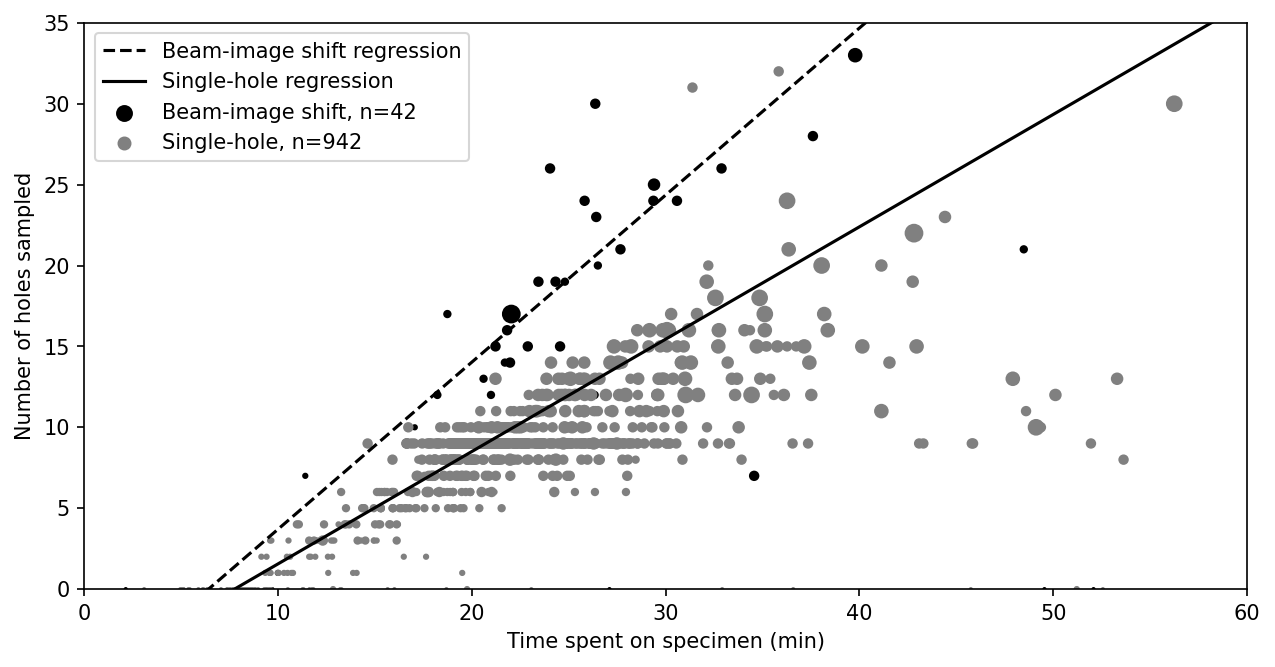

In [4]:
filt = stats.iloc[1:].loc[  (stats.timeSpent < 60)]
# print(filt)
filtered_no_bis = filt.loc[ filt.isBis == False]
filtered_bis = filt.loc[ filt.isBis == True]
# print(filt.shape[0],filtered_no_bis.shape[0],filtered_bis.shape[0])
linreg = LinearRegression()
ransac = RANSACRegressor(min_samples=20, max_trials=100000)
fig = plt.figure(figsize=(10,5),dpi=150)
for filtered,colorpoint,line,label in zip([filtered_bis,filtered_no_bis],['black','gray'],['--','-'],['Beam-image shift','Single-hole']):
    X = filtered.timeSpent.values.reshape(-1, 1)
    Y = filtered.holeCount.values.reshape(-1, 1)
    s = (filtered.squareCount.values.reshape(-1, 1).astype(float)+1)**2
    # print(s)
    linreg.fit(X,Y)
    ransac.fit(X,Y)
    X_pred=np.linspace(0,60,5).reshape(-1, 1)
    ransacY_pred = ransac.predict(X_pred, )
    Y_pred = linreg.predict(X_pred) 
    # y_predict = linreg.predict(X) 
    m, c = float(ransac.estimator_.coef_), float(ransac.estimator_.intercept_)
#         print("\nm={:.3f}, c={:.3f}".format(m, c))

    # R^2 & RMSE statistics
    inlier_mask = ransac.inlier_mask_
    x_accpt, y_accpt = X[inlier_mask], Y[inlier_mask]
    y_predict = linreg.predict(x_accpt) 

    R2 = r2_score(y_accpt, y_predict)
    RMSE = np.sqrt(mean_squared_error(y_accpt, y_predict))
    print(f"{label}| slope: {round(m,1)}, intercept: {round(c,1)}, R2: {round(R2,1)}, RMSE: {round(RMSE,1)}, Loading+atlas overhead: {round((0-c)/m,1)}")


 
    plt.scatter(X,Y, s=s,c=colorpoint, label=f'{label}, n={filtered.shape[0]}')
    plt.plot(X_pred, ransacY_pred, color='black',linestyle=line, label=f'{label} regression')
    plt.xlim([0,60])
    plt.ylim([0,35])
    plt.legend()
    plt.xlabel('Time spent on specimen (min)')
    plt.ylabel('Number of holes sampled')

    # print(ransac.score(X,Y), ransac.get_params())
    plt.savefig("/home/bouvettej2/screeningHoleTime.svg")

In [5]:
def calculate_stats(df):
    
    return df.shape[0], pd.DataFrame(dict(min= df.min(),max=df.max(),mean=df.mean(), median=df.median() ,std=df.std()))

In [6]:
total = calculate_stats(stats[['holeCount','squareCount','timeSpent']])
minus_black_grids = calculate_stats(stats[['holeCount','squareCount','timeSpent']].loc[(stats.squareCount > 0) & (stats.holeCount > 0)])
total_no_timeoutliers = calculate_stats(stats[['holeCount','squareCount','timeSpent']].loc[(stats.timeSpent <= 60)])
minus_black_grids_no_timeoutliers = calculate_stats(stats[['holeCount','squareCount','timeSpent']].loc[(stats.squareCount > 0) & (stats.holeCount > 0) & (stats.timeSpent <= 60)])


In [7]:
total,minus_black_grids,total_no_timeoutliers,minus_black_grids_no_timeoutliers

((1031,
                    min          max       mean     median         std
  holeCount           0          139   8.059166   9.000000    6.663725
  squareCount         0            9   2.516004   3.000000    1.383497
  timeSpent    2.133333  1439.983333  41.046912  21.116667  139.814681),
 (859,
                    min          max       mean     median        std
  holeCount           1          139   9.672875   9.000000   6.138369
  squareCount         1            9   3.013970   3.000000   0.896661
  timeSpent    9.133333  1179.883333  33.465347  21.783333  87.702359),
 (985,
                    min    max       mean     median       std
  holeCount           0    139   8.158376   9.000000  6.632123
  squareCount         0      9   2.552284   3.000000  1.355341
  timeSpent    2.133333  56.25  21.048037  20.866667  8.388660),
 (835,
                    min    max       mean  median       std
  holeCount           1    139   9.623952    9.00  6.146095
  squareCount         1      

<AxesSubplot:ylabel='Frequency'>

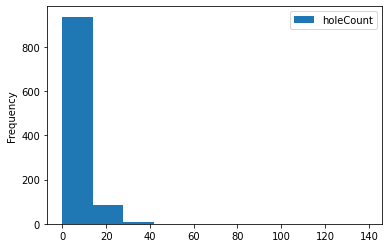

In [8]:
stats[['holeCount']].plot.hist()

<AxesSubplot:ylabel='Frequency'>

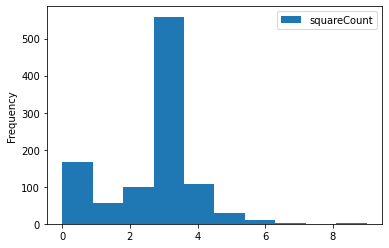

In [9]:
stats[['squareCount']].plot.hist()

<AxesSubplot:ylabel='Frequency'>

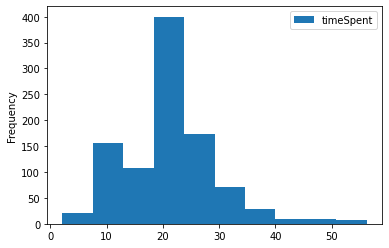

In [10]:
stats[['timeSpent']].loc[(stats.timeSpent <= 60)].plot.hist()

In [11]:
dategroup = stats.groupby('date').size()
date_stats=calculate_stats(pd.DataFrame(data=dategroup))
date_stats

(71,
    min  max       mean  median       std
 0    1   28  14.521127    16.0  5.272189)

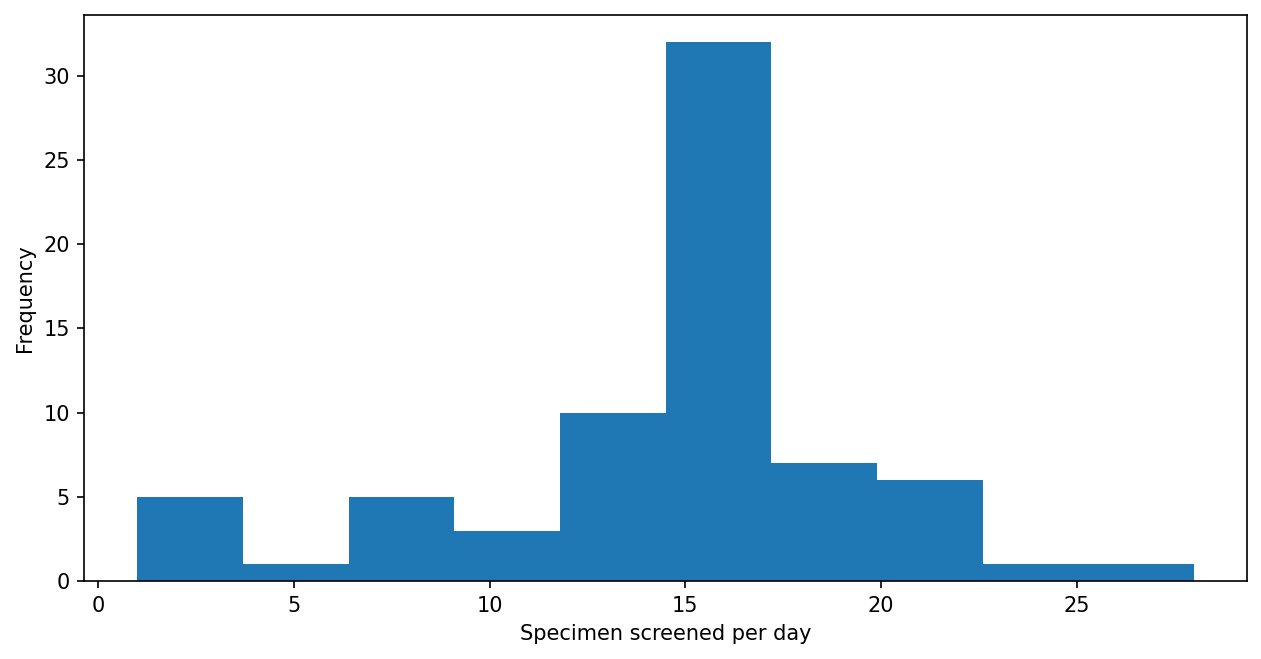

In [12]:
fig = plt.figure(figsize=(10,5),dpi=150)
dategroup.plot.hist()
plt.xlabel('Specimen screened per day')
# plt.axvline(date_stats[1].iloc[0].mean,label='mean')
plt.savefig("/home/bouvettej2/daily.svg")

In [13]:
collect_stats = get_grids_stats_datacollection()

[DEBUG] get_hole_count, 2022-01-21 13:30:08: 4311 completed holes, 292 queued holes, 117.9 holes per hour, 130 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:08: 425 completed holes, 0 queued holes, 120.8 holes per hour, 135 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:08: 955 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:09: 231 completed holes, 347 queued holes, 102.5 holes per hour, 116 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:10: 1264 completed holes, 0 queued holes, 71.9 holes per hour, 43 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:12: 3878 completed holes, 308 queued holes, 93.5 holes per hour, 89 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:12: 215 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:14: 1496 completed holes, 0 queued ho

Skipping 10_YR7-3


[DEBUG] get_hole_count, 2022-01-21 13:30:16: 4117 completed holes, 305 queued holes, 63.7 holes per hour, 0 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:17: 1993 completed holes, 203 queued holes, 123.2 holes per hour, 132 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:18: 1804 completed holes, 247 queued holes, 118.6 holes per hour, 122 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:19: 1004 completed holes, 677 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:20: 2301 completed holes, 0 queued holes, 131.6 holes per hour, 137 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:21: 1545 completed holes, 323 queued holes, 99.5 holes per hour, 113 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:23: 5358 completed holes, 0 queued holes, 108.9 holes per hour, 112 holes in the last hour


Skipping 11_SETX_DA17-2
Skipping 11_YR40_4


[DEBUG] get_hole_count, 2022-01-21 13:30:24: 659 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:25: 1040 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:26: 885 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:27: 1224 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:27: 1496 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:30: 4355 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:31: 1298 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:31: 984 completed holes, 0 queued hol

Skipping 1_DA11-1
Skipping 1_DA11-1
Skipping 1_DA11-1


[DEBUG] get_hole_count, 2022-01-21 13:30:40: 173 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:40: 83 completed holes, 0 queued holes, None holes per hour, None holes in the last hour


Skipping 1_fib01-3


[DEBUG] get_hole_count, 2022-01-21 13:30:40: 1170 completed holes, 0 queued holes, 128.5 holes per hour, 131 holes in the last hour


Skipping 1_Fib1
Skipping 1_g1
Skipping 1_Grid1
Skipping 1_grid1
Skipping 1_grid3
Skipping 1_grid3


[DEBUG] get_hole_count, 2022-01-21 13:30:41: 1292 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:41: 263 completed holes, 924 queued holes, 64.2 holes per hour, 65 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:42: 286 completed holes, 0 queued holes, 62.1 holes per hour, 76 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:47: 1521 completed holes, 8889 queued holes, 99.9 holes per hour, 114 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:47: 439 completed holes, 0 queued holes, 127.7 holes per hour, 137 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:48: 1624 completed holes, 227 queued holes, 98.3 holes per hour, 104 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:49: 1579 completed holes, 0 queued holes, 106.1 holes per hour, 116 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:51: 4777 completed holes, 0 queued ho

Skipping 1_KS49_2


[DEBUG] get_hole_count, 2022-01-21 13:30:55: 1628 completed holes, 1145 queued holes, 101.7 holes per hour, 84 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:30:57: 3384 completed holes, 1024 queued holes, 97.6 holes per hour, 104 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:02: 1922 completed holes, 5860 queued holes, 81.4 holes per hour, 0 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:03: 1535 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:03: 678 completed holes, 25 queued holes, 45.5 holes per hour, 13 holes in the last hour


Skipping 1_SK33_2


[DEBUG] get_hole_count, 2022-01-21 13:31:04: 1946 completed holes, 0 queued holes, 89.4 holes per hour, 96 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:05: 161 completed holes, 2 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:06: 470 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:07: 2351 completed holes, 0 queued holes, 39.0 holes per hour, 99 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:07: 297 completed holes, 0 queued holes, None holes per hour, None holes in the last hour


Skipping 2_grd2


[DEBUG] get_hole_count, 2022-01-21 13:31:09: 1587 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:10: 3341 completed holes, 0 queued holes, 140.9 holes per hour, 149 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:11: 990 completed holes, 2637 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:12: 1542 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:14: 4189 completed holes, 9 queued holes, 108.1 holes per hour, 127 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:16: 2741 completed holes, 492 queued holes, 115.8 holes per hour, 125 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:18: 2477 completed holes, 3469 queued holes, 98.2 holes per hour, 99 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:19: 1744 completed holes, 179 

Skipping 2_OB11-2


[DEBUG] get_hole_count, 2022-01-21 13:31:20: 1966 completed holes, 87 queued holes, 87.3 holes per hour, 80 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:22: 5018 completed holes, 560 queued holes, 114.4 holes per hour, 50 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:23: 2992 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:25: 1885 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:26: 1088 completed holes, 878 queued holes, 104.3 holes per hour, 81 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:27: 1298 completed holes, 688 queued holes, 55.6 holes per hour, 36 holes in the last hour


Skipping 3_CH006_2


[DEBUG] get_hole_count, 2022-01-21 13:31:27: 989 completed holes, 343 queued holes, 74.2 holes per hour, 0 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:28: 332 completed holes, 0 queued holes, 67.0 holes per hour, 0 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:28: 1204 completed holes, 0 queued holes, 64.3 holes per hour, 67 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:29: 1517 completed holes, 0 queued holes, 130.7 holes per hour, 126 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:29: 421 completed holes, 0 queued holes, 78.2 holes per hour, 80 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:30: 1145 completed holes, 0 queued holes, 109.7 holes per hour, 115 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:30: 1207 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:31: 960 completed holes, 115 queued holes, 64.

Skipping 3_SpikeUK_2G


[DEBUG] get_hole_count, 2022-01-21 13:31:33: 935 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:33: 75 completed holes, 6 queued holes, 82.8 holes per hour, 75 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:34: 1881 completed holes, 0 queued holes, 118.5 holes per hour, 114 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:35: 218 completed holes, 5 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:36: 1426 completed holes, 371 queued holes, 88.8 holes per hour, 97 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:38: 1792 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:38: 485 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:40: 1375 completed holes, 2886 queued hole

Skipping 7_Asyn1-2


[DEBUG] get_hole_count, 2022-01-21 13:31:47: 2068 completed holes, 0 queued holes, 135.6 holes per hour, 144 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:48: 624 completed holes, 172 queued holes, 102.7 holes per hour, 109 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:49: 1028 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:50: 1873 completed holes, 0 queued holes, 5.6 holes per hour, 0 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:50: 916 completed holes, 1603 queued holes, 51.3 holes per hour, 9 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:51: 1129 completed holes, 293 queued holes, 73.0 holes per hour, 93 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:52: 1705 completed holes, 0 queued holes, 125.3 holes per hour, 132 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:31:55: 6292 completed holes, 0 queued hole

Skipping 9_AR3-1


[DEBUG] get_hole_count, 2022-01-21 13:32:00: 1478 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:32:01: 1811 completed holes, 0 queued holes, 94.3 holes per hour, 98 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:32:02: 1185 completed holes, 170 queued holes, 84.9 holes per hour, 97 holes in the last hour


Skipping 9_BK56_3


[DEBUG] get_hole_count, 2022-01-21 13:32:04: 4490 completed holes, 905 queued holes, 71.5 holes per hour, 0 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:32:04: 224 completed holes, 0 queued holes, None holes per hour, None holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:32:05: 580 completed holes, 625 queued holes, 5.2 holes per hour, 0 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:32:07: 4784 completed holes, 0 queued holes, 123.3 holes per hour, 120 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:32:08: 1145 completed holes, 0 queued holes, 78.6 holes per hour, 73 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:32:09: 1719 completed holes, 118 queued holes, 103.3 holes per hour, 102 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:32:09: 1282 completed holes, 460 queued holes, 84.6 holes per hour, 79 holes in the last hour
[DEBUG] get_hole_count, 2022-01-21 13:32:10: 529 completed holes, 1164 queued hol

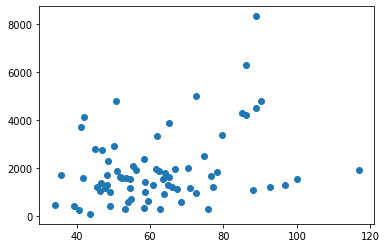

In [14]:
plt.scatter(collect_stats['timeTo50'],collect_stats['completed'])


In [15]:
polg_stat

NameError: name 'polg_stat' is not defined

In [ ]:
overnight = calculate_stats(collect_stats[['completed','perhour','timeSpent','timeTo50','lasthour']].loc[(collect_stats.completed > 500) & (collect_stats.collectionType == 'overnight')])
weekend = calculate_stats(collect_stats[['completed','perhour','timeSpent','timeTo50','lasthour']].loc[(collect_stats.completed > 500) & (collect_stats.collectionType == 'weekend')])
overnight, weekend

((39,
                    min          max         mean       median         std
  completed         565         2301  1371.102564  1375.000000  423.561391
  perhour           5.2        135.6    94.046154    99.900000   30.576073
  timeSpent  364.406147  1048.820299   819.431908   892.725534  188.441371
  timeTo50    35.869718   100.112749    59.205559    56.291957   12.709156
  lasthour          0.0        147.0    87.179487    97.000000   46.434941),
 (25,
                     min          max         mean       median          std
  completed         1202         8333  3408.680000  3341.000000  1692.046683
  perhour           39.0        140.9    95.668000    97.600000    25.649102
  timeSpent  1123.319593  3869.034113  2087.694392  2080.138513   850.279996
  timeTo50     41.137129   116.890792    71.714119    72.614248    19.680191
  lasthour           0.0        158.0    85.480000    98.000000    46.478597))

In [18]:
combined = calculate_stats(collect_stats[['completed','perhour','timeSpent','timeTo50','lasthour']].loc[(collect_stats.completed > 500)])
combined

(64,
                   min          max         mean       median          std
 completed         565         8333  2167.031250  1634.500000  1484.195982
 perhour           5.2        140.9    94.679688    98.250000    28.551030
 timeSpent  364.406147  3869.034113  1314.846941   961.825668   828.128001
 timeTo50    35.869718   116.890792    64.091715    61.658908    16.816909
 lasthour          0.0        158.0    86.515625    97.500000    46.089283)

In [24]:
df = collect_stats[['completed','perhour','timeSpent','timeTo50','lasthour']].loc[(collect_stats.completed > 500)]
df['setuptime'] = df.timeTo50 - 50/df.perhour*60
df['setupPer1000'] = df.setuptime/df.completed*1000
df = df.loc[(df.setuptime > 5)]
stats_df = calculate_stats(df.loc[(df.setuptime > 5)])
stats_df

(58,
                      min          max         mean       median          std
 completed            565         8333  2155.482759  1626.000000  1502.142636
 perhour             51.3        140.9   100.100000   100.800000    22.317101
 timeSpent     364.406147  3869.034113  1280.804854   961.825668   788.821680
 timeTo50       35.869718   116.890792    65.672844    63.651205    16.773557
 lasthour             0.0        158.0    93.603448   100.500000    40.783528
 setuptime       5.359412    80.035755    33.951013    31.509466    16.727572
 setupPer1000     3.97213    54.510894    19.316574    16.902424    11.385954)

| slope: 9.0, intercept: 1224.1, R2: -5.9, RMSE: 794.4, Loading+atlas overhead: -136.1


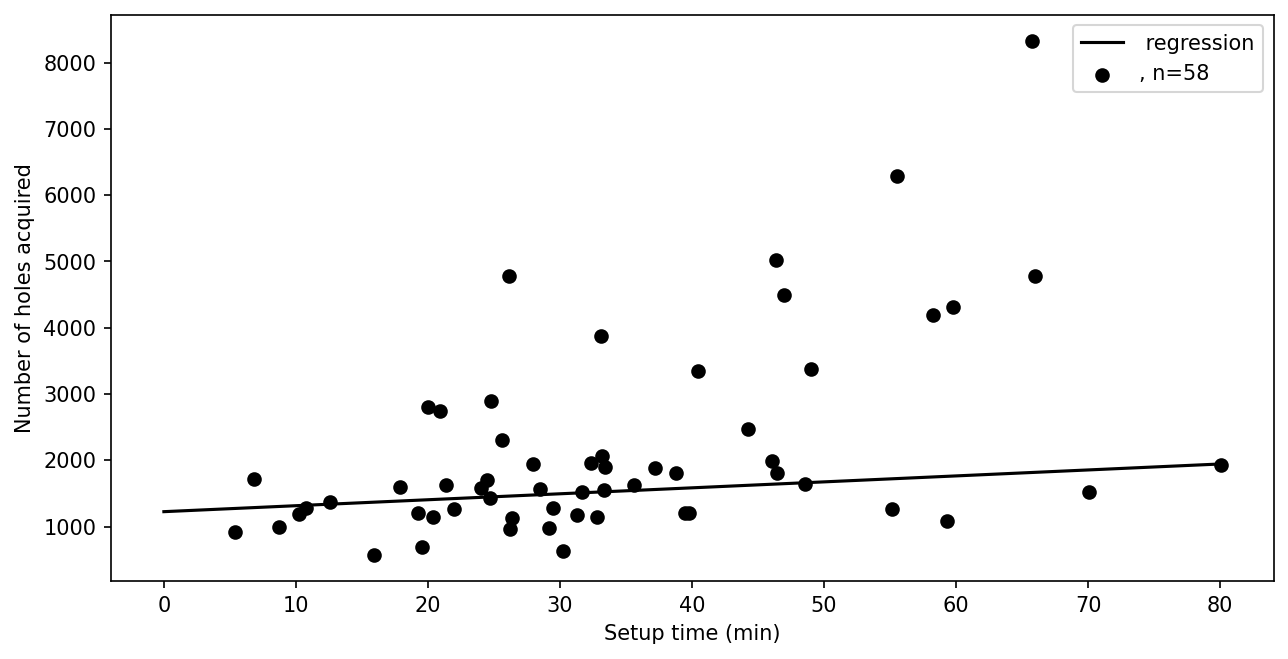

In [31]:
filt = df.loc[df.setuptime < 70]
# print(filt)
# filtered_no_bis = filt.loc[ filt.isBis == False]
# filtered_bis = filt.loc[ filt.isBis == True]
# print(filt.shape[0],filtered_no_bis.shape[0],filtered_bis.shape[0])
linreg = LinearRegression()
ransac = RANSACRegressor(min_samples=10, max_trials=100000)
fig = plt.figure(figsize=(10,5),dpi=150)
for filtered,colorpoint,line,label in zip([filt],['black',],['-'],['']):
    X = filtered.setuptime .values.reshape(-1, 1)
    Y = filtered.completed.values.reshape(-1, 1)
    # s = (filtered.squareCount.values.reshape(-1, 1).astype(float)+1)**2
    # print(s)
    linreg.fit(X,Y)
    ransac.fit(X,Y)
    X_pred=np.linspace(0,80,5).reshape(-1, 1)
    ransacY_pred = ransac.predict(X_pred, )
    Y_pred = linreg.predict(X_pred) 
    # y_predict = linreg.predict(X) 
    m, c = float(ransac.estimator_.coef_), float(ransac.estimator_.intercept_)
#         print("\nm={:.3f}, c={:.3f}".format(m, c))

    # R^2 & RMSE statistics
    inlier_mask = ransac.inlier_mask_
    x_accpt, y_accpt = X[inlier_mask], Y[inlier_mask]
    y_predict = linreg.predict(x_accpt) 

    R2 = r2_score(y_accpt, y_predict)
    RMSE = np.sqrt(mean_squared_error(y_accpt, y_predict))
    print(f"{label}| slope: {round(m,1)}, intercept: {round(c,1)}, R2: {round(R2,1)}, RMSE: {round(RMSE,1)}, Loading+atlas overhead: {round((0-c)/m,1)}")


 
    plt.scatter(X,Y, c=colorpoint, label=f'{label}, n={filtered.shape[0]}')
    plt.plot(X_pred, ransacY_pred, color='black',linestyle=line, label=f'{label} regression')
    # plt.xlim([0,60])
    # plt.ylim([0,35])
    plt.legend()
    plt.xlabel('Setup time (min)')
    plt.ylabel('Number of holes acquired')


<AxesSubplot:ylabel='Frequency'>

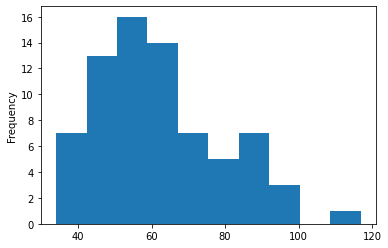

In [ ]:
collect_stats.timeTo50.plot.hist()

In [ ]:
df1= collect_stats[['grid_id','date','timeSpent']].loc[(collect_stats.completed > 500) ]
df1.loc[df1.timeSpent > 24*60,['timeSpent']] = 24*60
all_data = stats[['grid_id','date','timeSpent']].loc[(stats.date.isin(df1.date.tolist())) & (stats.timeSpent < 40)].append(df1,ignore_index=True)
print(all_data.shape[0])
alldate_group = all_data.groupby('date')
hours = alldate_group.sum()/60

754


(67,
    min  max       mean  median       std
 0    1   28  15.313433    16.0  4.261203)

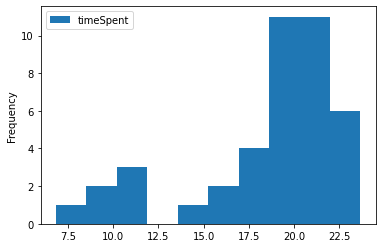

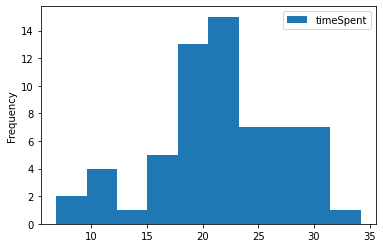

In [ ]:
hours.loc[hours.timeSpent < 24].plot.hist()
hours.plot.hist()
hours_stats=calculate_stats(pd.DataFrame(data=dategroup))
hours_stats

In [ ]:
all_data_grids = list(AutoloaderGrid.objects.filter(grid_id__in=all_data.grid_id.tolist()))


In [ ]:
len(all_data_grids)
for grid in all_data_grids:
    if grid.end_time.date() != grid.start_time.date():
        print(grid.grid_id , 'spans more than one day')
        
        span = [grid.start_time.date(), grid.end_time.date()]
        print(span[1]-span[0])


10AR2-1117-1O8DXVEEW8bMKYCRO3T spans more than one day
1 day, 0:00:00
10ES1-0901-1qt4ECnQbvYcAGlJ4wJ spans more than one day
2 days, 0:00:00
10KS59_4U7Ik6wfUm55wzWmN6aVwTh spans more than one day
2 days, 0:00:00
11AR2_1117_4IZ8b5F1yebYQtYhZy2 spans more than one day
2 days, 0:00:00
11CH14_2h2XMjoPxO9SSdaw863MBPO spans more than one day
1 day, 0:00:00
11CH15_4nT8B7bAafPShxuRw4bKDUZ spans more than one day
1 day, 0:00:00
11GZ12_3BQ6tDztVjPDwBpA4Ro9JHf spans more than one day
1 day, 0:00:00
11KS47_4L8edqdnUyBqflc0HMm6eie spans more than one day
1 day, 0:00:00
1AR1_0723_1sAK7wdkcXo18pTSstfm spans more than one day
3 days, 0:00:00
1BK57_1iqmERmAys3DxvL05Tt2VzE6 spans more than one day
1 day, 0:00:00
1BK58_18IYsNUpVu6uZ6ZFobQVE5MQ spans more than one day
1 day, 0:00:00
1BK60_1m1Z7tk4f3vGqNZrBg6cXgJn spans more than one day
1 day, 0:00:00
1CH5_1hUau6FoJxzwmlKZ6WSC0iiyE spans more than one day
1 day, 0:00:00
1fib01-3N6hE6woaIbFlNfrfEp6lgE spans more than one day
1 day, 0:00:00
1JG46-3li6M5PaqW